# Análise exploratória de dados - Estatísticas da NBA 2021-22

Esse projeto foi realizado com objetivo de fazer uma análise explorátoria de dados de um dataset de estátisticas dos jogadores na temporada 2021-2022 da NBA. O dataset é baseado em estatísticas de jogos de playoffs da NBA 2021-22, tratando de jogos, estatísticas dos jogadores durante o período de playoffs da liga de basquete americana.

Metadados(Dicionários) do dataset:<br>
Rk - Rank;<br>
Player - Nome do jogadores;<br>
Age - idade dos jogadores;<br>
Tm - Time;<br>
G - Jogos;<br>
GS - Jogos iniciando;<br>
FG - Cestas por jogos;<br>
FGA - Tentativa de cestas por jogos;<br>
FG% - Porcentagem de cestas por jogo;<br>
3P - Frequência de cestas de 3 pontos por jogo;<br>
3PA: tentativas de cestas de 3 pontos por jogo;<br>
3P%: porcentagem de arremessos de 3 pontos;<br>
2P: arremessos de 2 pontos por jogo;<br>
2PA: tentativas de field goal de 2 pontos por jogo;<br>
2P%: porcentagem de arremessos de 2 pontos;<br>
eFG%: Porcentagem de gol de campo efetivo;<br>
FT: Lances livres por jogo;<br>
FTA: Tentativas de lance livre por jogo;<br>
FT%: porcentagem de lance livre;<br>
ORB: rebotes ofensivos por jogo;<br>
DRB: Rebotes defensivos por jogo;<br>
TRB: Total de rebotes por jogo;<br>
AST: Assistências por jogo;<br>
STL: Roubos por jogo;<br>
BLK: Blocos por jogo;<br>
TOV: Turnovers por jogo;<br>
PF: Faltas pessoais por jogo;<br>
PTS: Pontos por jogo;<br>


**Instalação de pacotes para execução do projeto:**

In [ ]:
%pip install psycopg2

In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [ ]:
%kaggle datasets download -d loganlauton/nba-players-and-team-data

In [ ]:
%pip install kaggle

# Dícionário de dados

O dataset é composto por uma única tabela, Sales Transaction, de 500.000 linhas, constituído por 8 campos: <br>
TransactionNo - Numéro de seis dígitos únicos que definem cada transação; <br>
Date - Data de quando cada transação foi gerada; <br>
ProductNo - Um número de cinco ou seis dígitos usado para especificar um determinado produto; <br>
Product - Nome do produto; <br> 
Price - preço de cada produto por unidade em peso esterlinos(£); <br> 
Quantity - Quantidade de cada produto por transação. Valores negativos relacionados a cancelamentos; <br>
CustomerNo - um número de cinco dígitos que define cada cliente; <br>
Country - Nome do país onde o cliente reside; <br>

Link para o dataset: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

In [4]:
import psycopg2 as pg
import pandas as pd
import sys


# parametros = {"host": "localhost",
#              "database": "NBA",
#              "port": 5432,
#              "user": "postgres",
#              "password": "28549108"}
# def conexao_existe(parametros):
#     #conectando com o db Antaq - Postgres
#     conn = None
#     try:
#         #tenta conectar
#         print('Conectando com o banco no PostgreSQL...')
#         conn = pg.connect(**parametros)
#     #não conecta exceto se:
#     except  (Exception, pg.DatabaseError) as error:
#         print (error)
#         sys.exit(1)
#     print("Conexão realizada com sucesso")
#     return conn

In [2]:
# def pg_to_pd(conn, select_query, colunas):
#     #Transformando a SELECT QUERY em dataframe
#     cursor = conn.cursor()
#     try: 
#         cursor.execute(select_query)
#     except (Exception, pg.DatabaseError) as error:
#         print("Error: %s" % error)
#         cursor.close()
#         return 1
    
#     tuplas = cursor.fetchall()
#     cursor.close()
    
#     df = pd.DataFrame(tuplas, columns=colunas)
#     return df

In [ ]:
# conn = conexao_existe(parametros)

# nomes_col = ["Nome", "salário", "Ajuste de inflação"]

# df = pg_to_pd(conn, "select player_name, MAX(salary) AS salarios, inflation_adj_salary from tb_salaries GROUP BY player_name, inflation_adj_salary ORDER BY player_name, salarios DESC LIMIT 50", nomes_col)
# df

In [73]:
import kaggle 

kaggle.api.dataset_download_files('vivovinco/nba-player-stats', path='C:/nba-stats/nba_status', unzip=True)

In [25]:
df = pd.read_csv('C:/nba-stats/nba_status/2021-2022 NBA Player Stats - Playoffs.csv', sep=';', engine='python')
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,20,MEM,10,1,16.8,2.3,5.2,...,0.923,0.4,1.2,1.6,0.5,0.5,0.0,0.2,1.4,6.9
213,214,Delon Wright,SG,29,ATL,5,0,27.4,3.0,5.8,...,0.667,2.2,2.6,4.8,2.8,0.8,0.2,1.0,0.4,8.2
214,215,Thaddeus Young,PF,33,TOR,6,0,14.5,1.5,3.0,...,0.250,1.2,1.8,3.0,1.7,0.8,0.2,0.5,1.3,3.3
215,216,Trae Young,PG,23,ATL,5,5,37.2,4.4,13.8,...,0.788,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4


In [40]:
df2 = pd.read_csv("C:/NBA_dataset/player_info.csv", sep=',', encoding='UTF-8', engine='python')

In [81]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,109.000000,26.589862,8.714286,4.009217,19.429032,3.045161,6.737788,0.437516,0.934562,2.700461,...,0.623249,0.773733,2.626728,3.404147,1.828571,0.584793,0.361290,1.085714,1.784332,8.457143
std,62.786676,4.238545,5.802412,5.944178,12.879892,2.699843,5.865455,0.184581,0.969323,2.538454,...,0.344243,0.848965,2.203811,2.842360,2.007120,0.499629,0.453458,1.126790,1.175811,7.625418
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,23.000000,5.000000,0.000000,7.600000,1.000000,2.000000,0.370000,0.000000,0.500000,...,0.500000,0.200000,1.000000,1.200000,0.400000,0.200000,0.000000,0.300000,0.800000,2.100000
50%,109.000000,26.000000,6.000000,0.000000,18.400000,2.300000,4.700000,0.439000,0.700000,2.200000,...,0.750000,0.500000,2.000000,2.800000,1.000000,0.500000,0.200000,0.800000,1.800000,6.000000
75%,163.000000,29.000000,12.000000,6.000000,31.200000,4.500000,10.000000,0.500000,1.500000,4.400000,...,0.857000,1.000000,3.700000,4.800000,2.700000,0.900000,0.500000,1.500000,2.800000,12.600000
max,217.000000,38.000000,24.000000,24.000000,44.000000,12.200000,23.800000,1.000000,4.100000,10.400000,...,1.000000,5.500000,12.000000,14.300000,9.800000,2.100000,2.500000,6.200000,4.700000,31.700000


In [16]:
filtros_nba = ['PTS', 'Age', 'MP', 'FG']

In [17]:
filtros_nba_2 = ['3P', '3PA', '2PA', 'AST', 'ORB']

In [18]:
colunas_nba = df.filter(items=filtros_nba)

In [19]:
colunas_nba_2 = df.filter(items=filtros_nba_2)

In [43]:
df2.describe()

,From,To,Wt
count,5018.000000,5018.000000,5013.000000
mean,1988.367477,1992.556596,209.322761
std,22.457971,23.171305,26.022681
min,1947.000000,1947.000000,114.000000
25%,1971.000000,1974.000000,190.000000
50%,1990.000000,1996.000000,210.000000
75%,2008.000000,2014.000000,225.000000
max,2022.000000,2022.000000,360.000000


In [47]:
df2.columns.values

array(['playerName', 'From', 'To', 'Pos', 'Ht', 'Wt', 'birthDate',
       'Colleges'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (11,5) )
box = plt.boxplot([colunas_nba[colunas_nba['Age'] == age]['Player'] for age in colunas_nba['Age'].unique()], labels=colunas_nba['Age'].unique())
plt.title('Boxplot de taxa ocupação em dias, minutos/dia', fontsize=12)
plt.xlabel('País')
plt.ylabel('Valor Total - Receita em compra')
plt.grid(axis='y')
# c1 = 0
# for mes in df_taxa['mês taxa']:
#     mes.set(color=colors[c1])
# c1 =+1
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize= (11,5) )
# box = plt.boxplot([df[df['age'] == weight]['playerName'] for weight in df2['Wt'].unique()], labels=df2['Wt'].unique())
# plt.title('Boxplot de taxa ocupação em dias, minutos/dia', fontsize=12)
# plt.xlabel('País')
# plt.ylabel('Valor Total - Receita em compra')
# plt.grid(axis='y')
# # c1 = 0
# # for mes in df_taxa['mês taxa']:
# #     mes.set(color=colors[c1])
# # c1 =+1
# plt.show()

In [23]:
colunas_nba_2.describe()

,3P,3PA,2PA,AST,ORB
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.934562,2.700461,4.037788,1.828571,0.773733
std,0.969323,2.538454,4.094277,2.007120,0.848965
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,1.100000,0.400000,0.200000
50%,0.700000,2.200000,2.600000,1.000000,0.500000
75%,1.500000,4.400000,5.800000,2.700000,1.000000
max,4.100000,10.400000,20.300000,9.800000,5.500000


Text(0.5, 1.0, 'Boxplot dos pontos, idade, minutos jog., cestas')

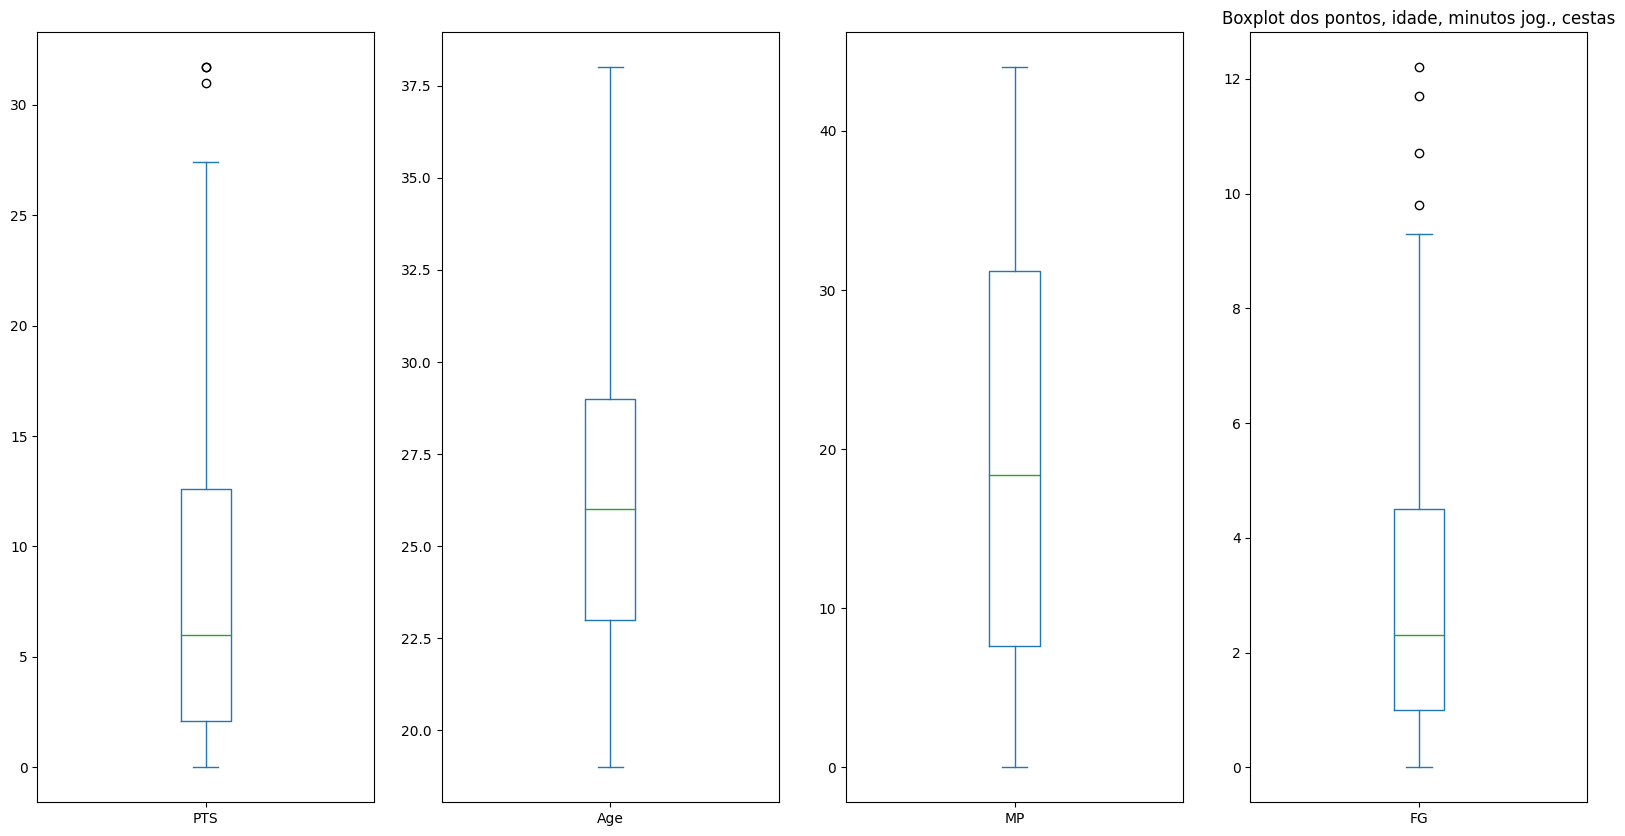

In [81]:
colunas_nba.plot(kind='box', figsize=(20,10), subplots=True)
plt.title('Boxplot dos pontos, idade, minutos jog., cestas', loc='center')

Text(0.5, 1.0, 'Boxplot dos 3P, Tentativas de 3P, Tentativa de 2P, Assistências, Rebotes Ofensivos')

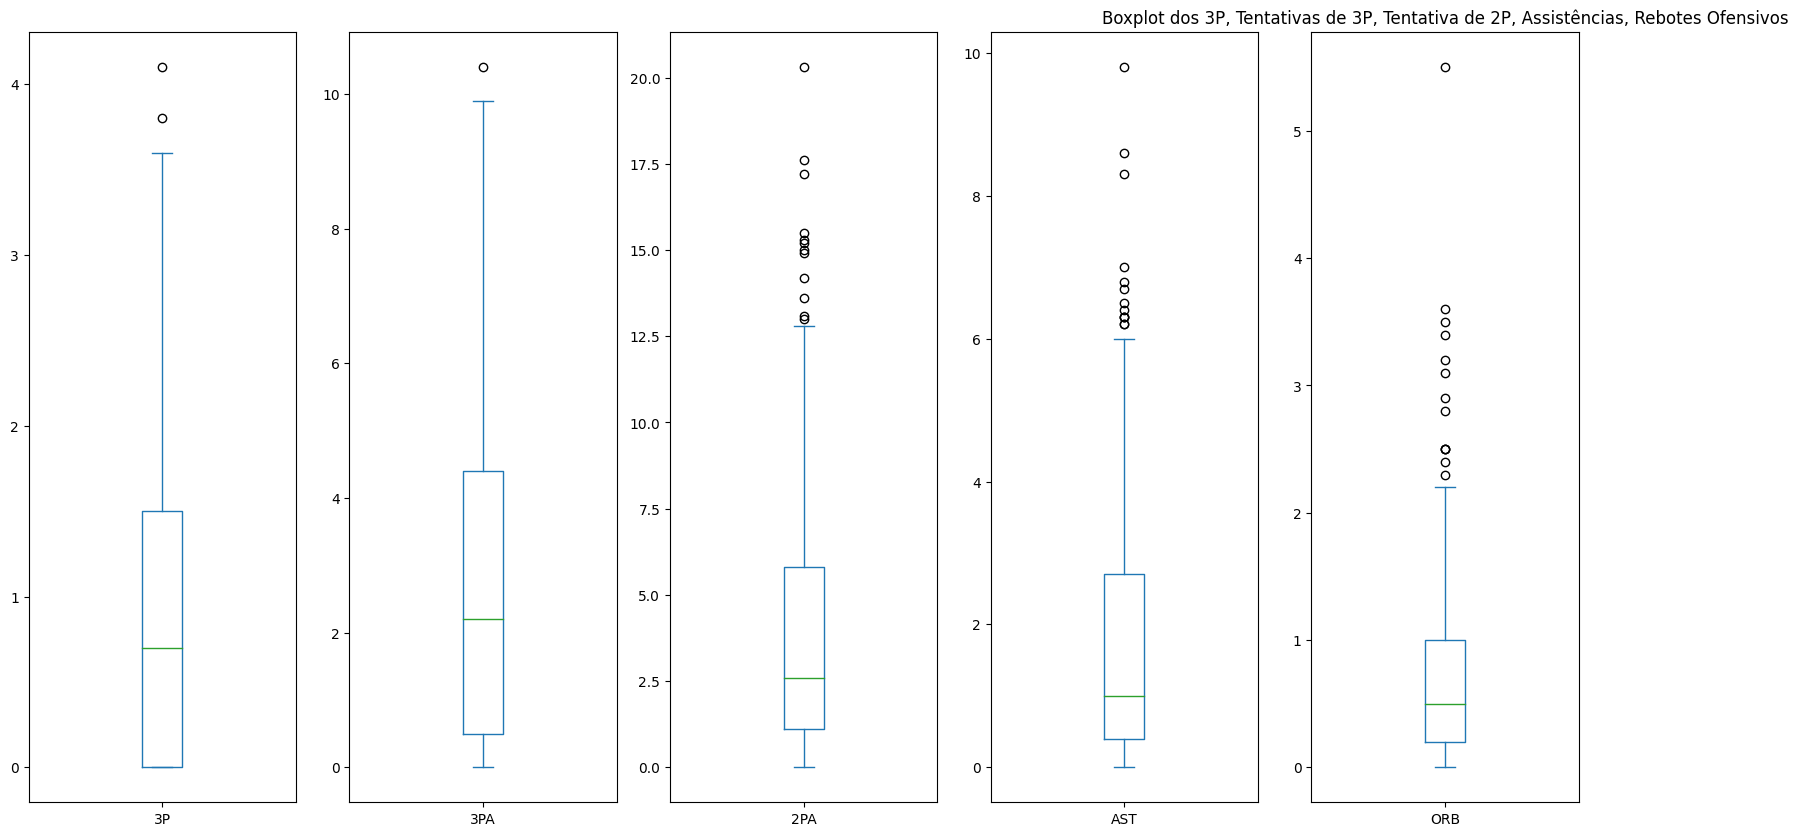

In [80]:
colunas_nba_2.plot(kind='box', figsize=(20,10), subplots=True)
plt.title('Boxplot dos 3P, Tentativas de 3P, Tentativa de 2P, Assistências, Rebotes Ofensivos', loc='center')

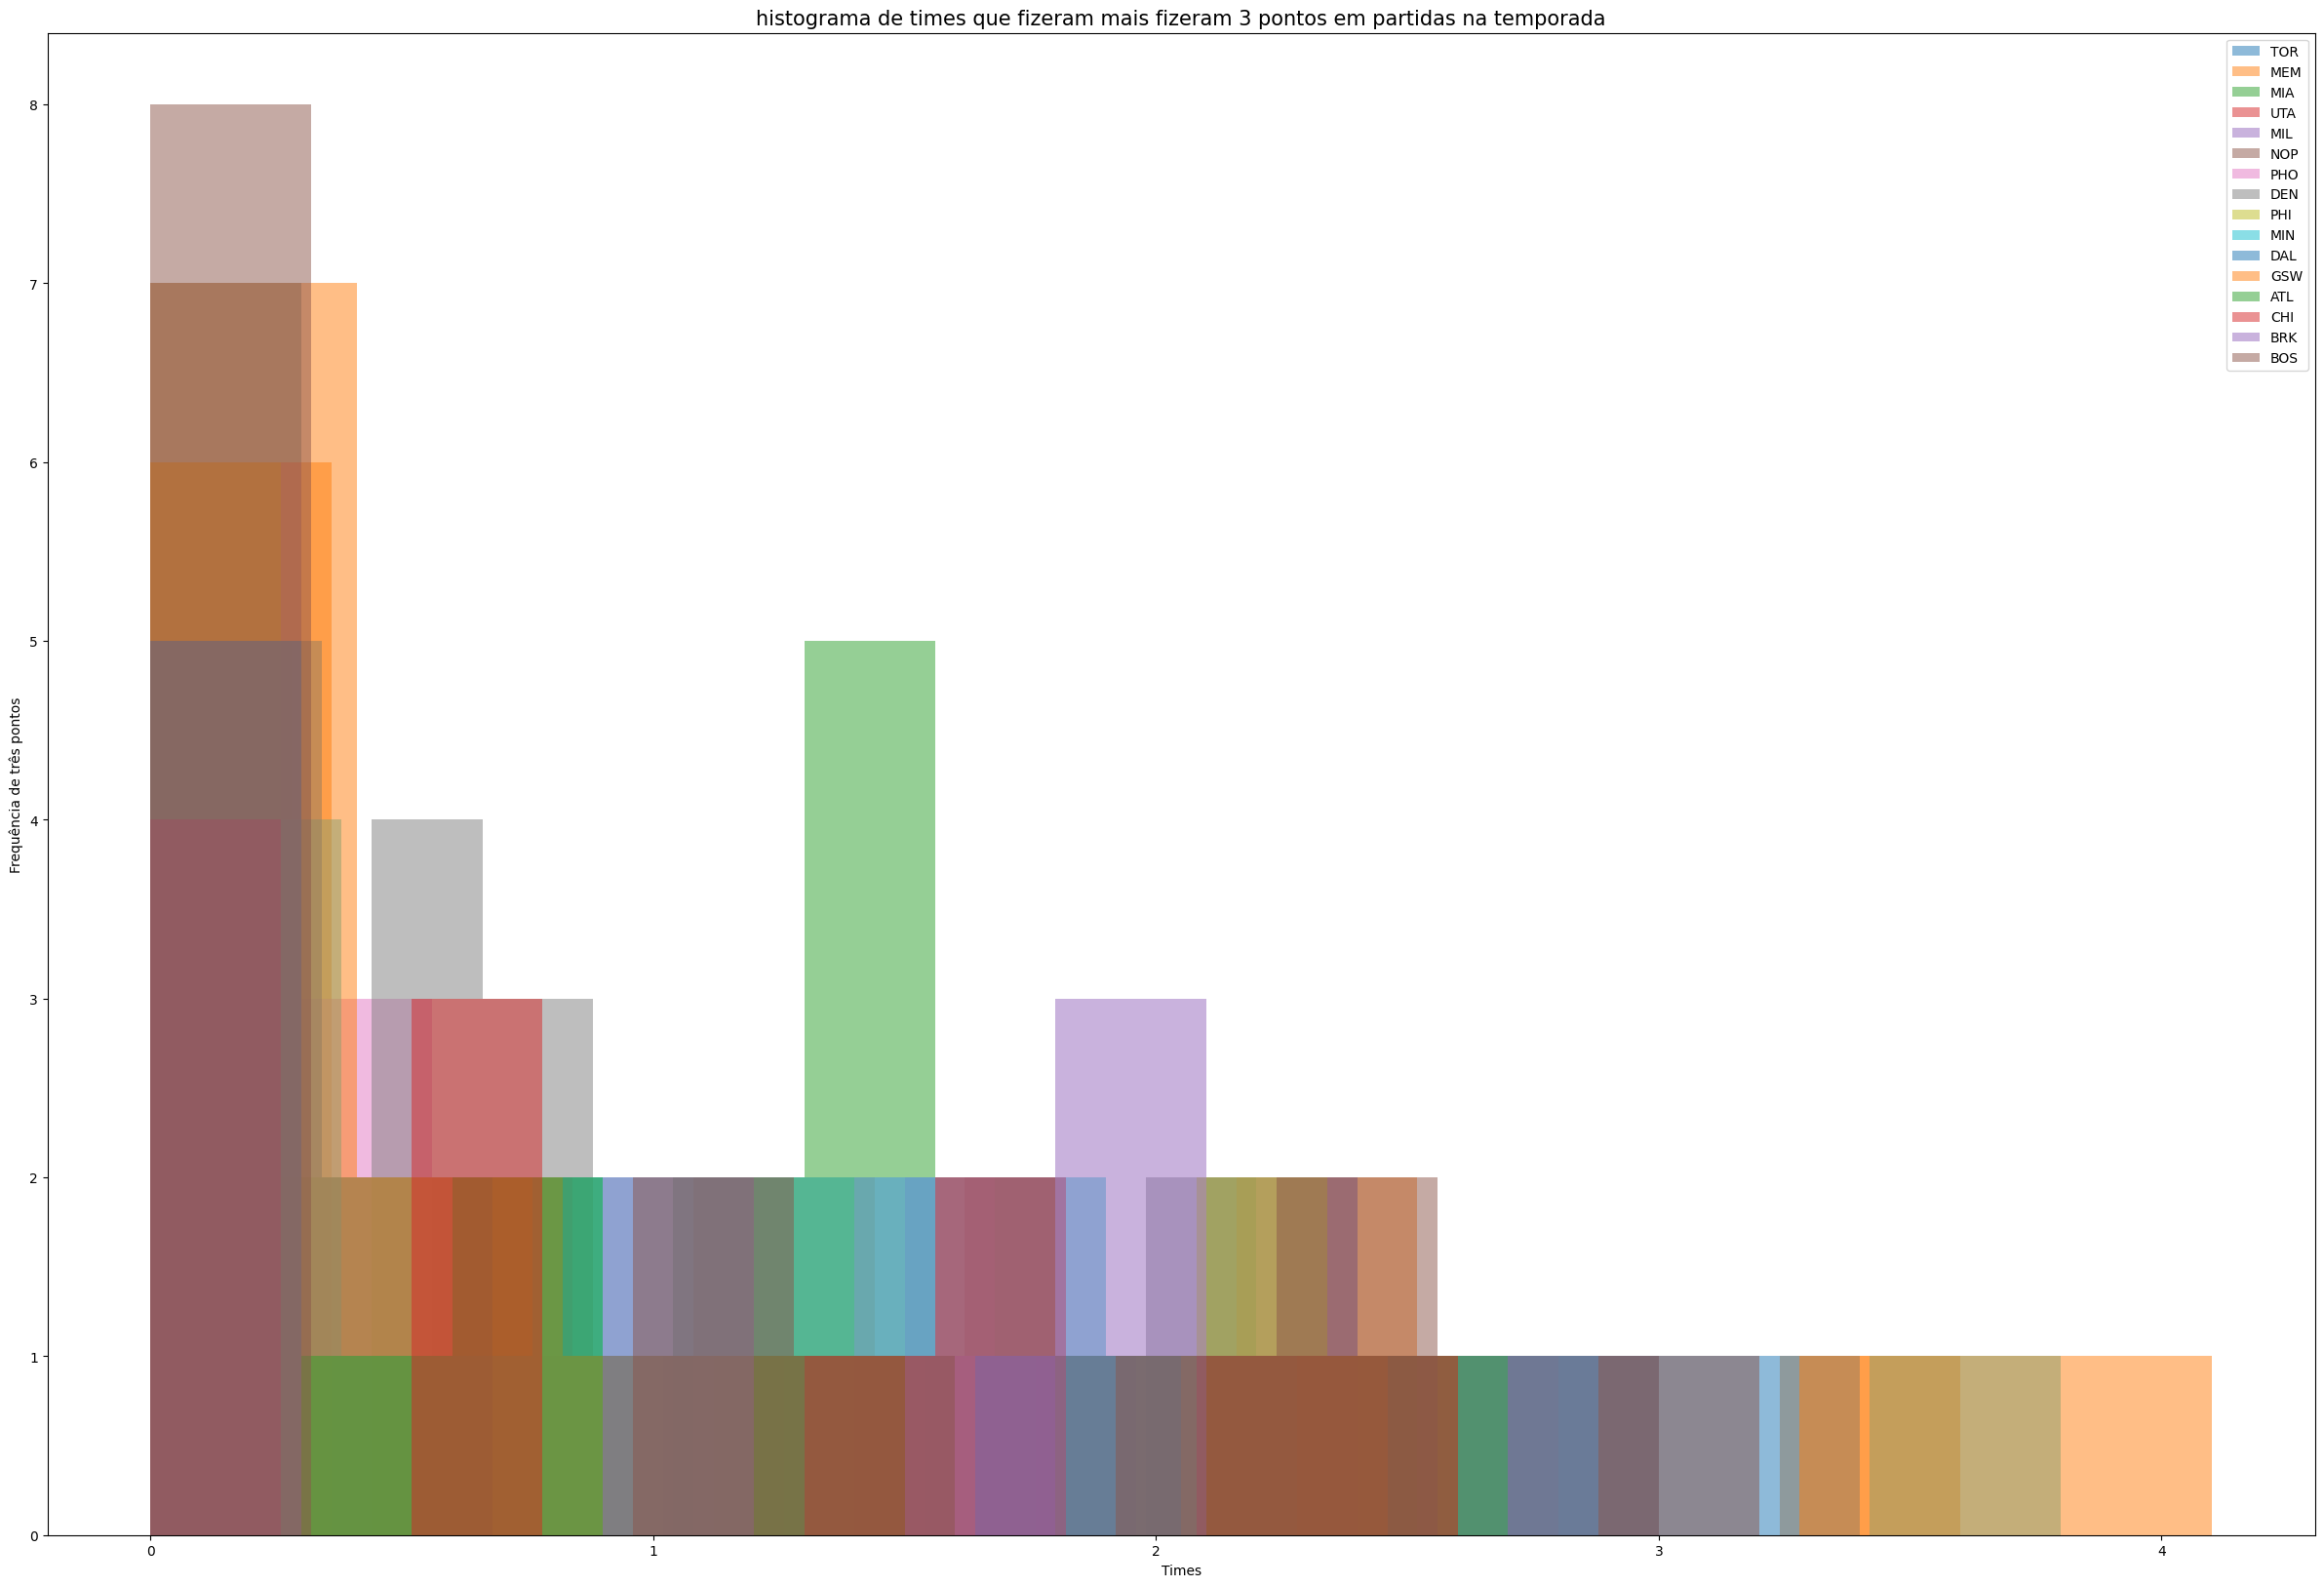

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize= (30,20) )
for teams in df['Tm'].unique():
  plt.hist(df[df['Tm'] == teams]['3P'], bins=10, alpha=0.5, label=teams)
plt.title('histograma de times que fizeram mais fizeram 3 pontos em partidas na temporada', fontsize=15)
plt.xlabel('Times')
plt.ylabel('Frequência de três pontos')
plt.legend()
plt.show()

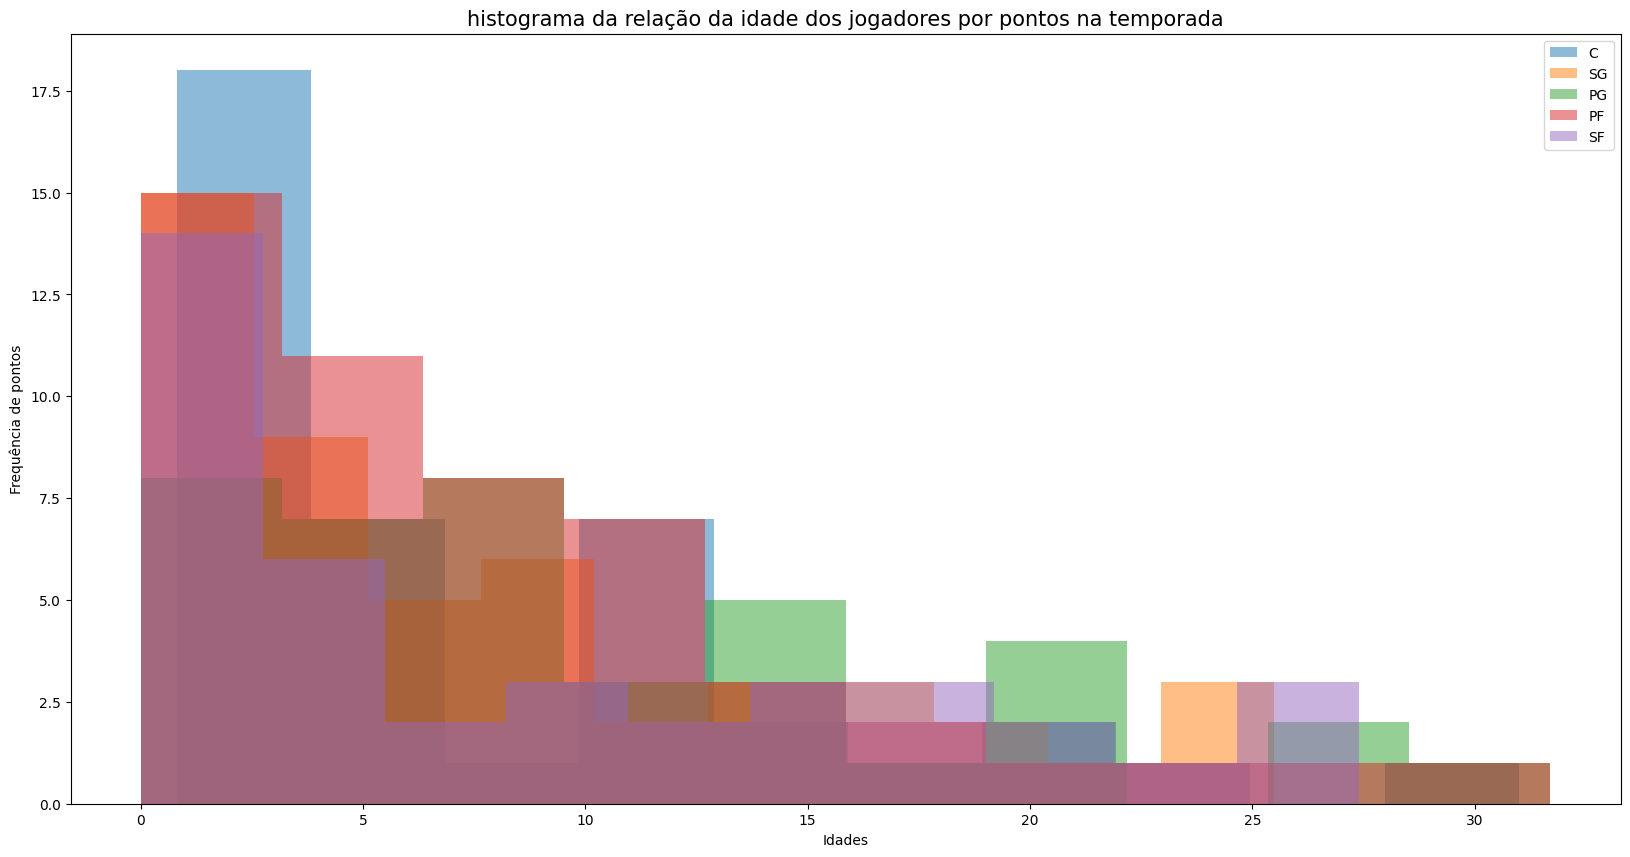

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,10) )
for pos in df['Pos'].unique():
  plt.hist(df[df['Pos'] == pos]['PTS'], bins=10, alpha=0.5, label=pos)
plt.title('histograma da relação da idade dos jogadores por pontos na temporada', fontsize=15)
plt.xlabel('Idades')
plt.ylabel('Frequência de pontos')
plt.legend()
plt.show()

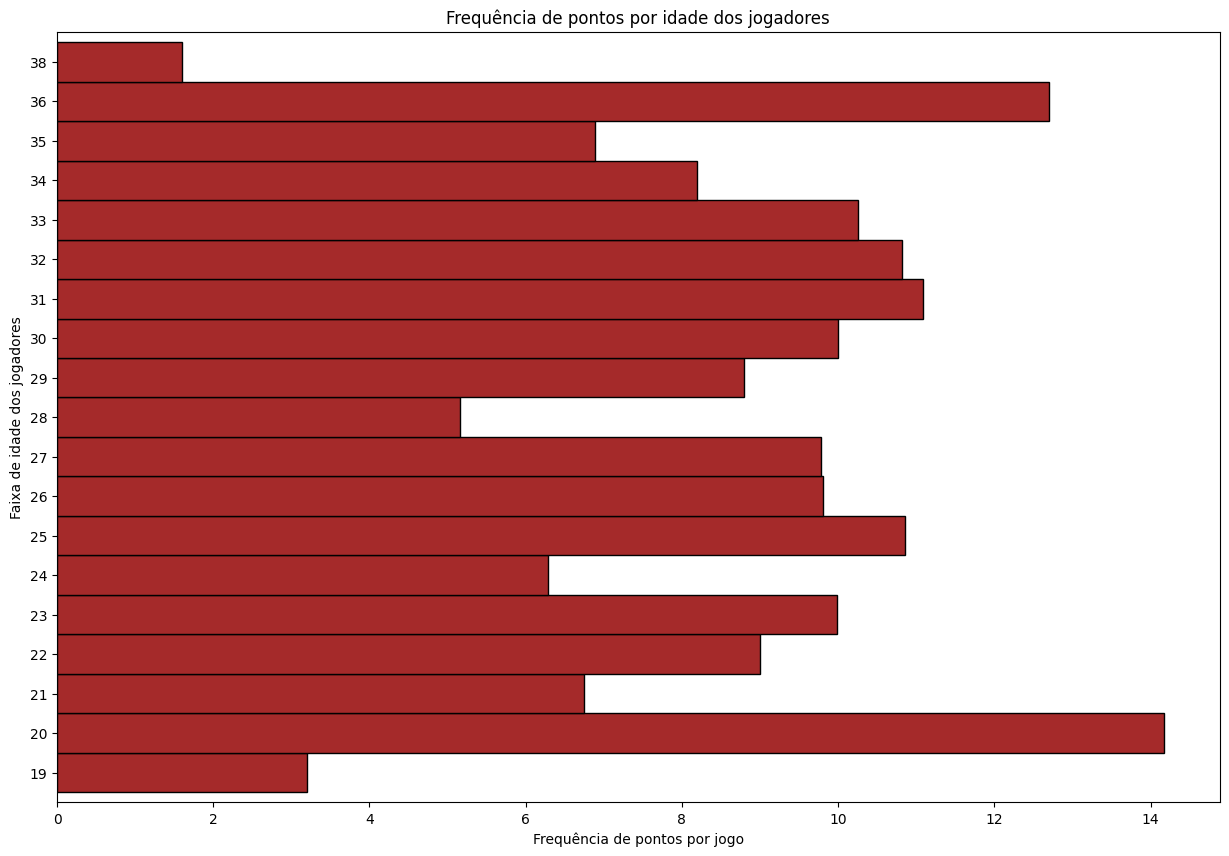

In [76]:
colunas_nba.query("`PTS` > 0").groupby('Age')['PTS'].mean().plot(
        kind= 'barh',
        color= 'Brown',
        figsize = (15,10),
        width= 1,
        edgecolor= 'black'
)

plt.xlabel('Frequência de pontos por jogo')
plt.ylabel('Faixa de idade dos jogadores')
plt.title('Frequência de pontos por idade dos jogadores')
plt.show()

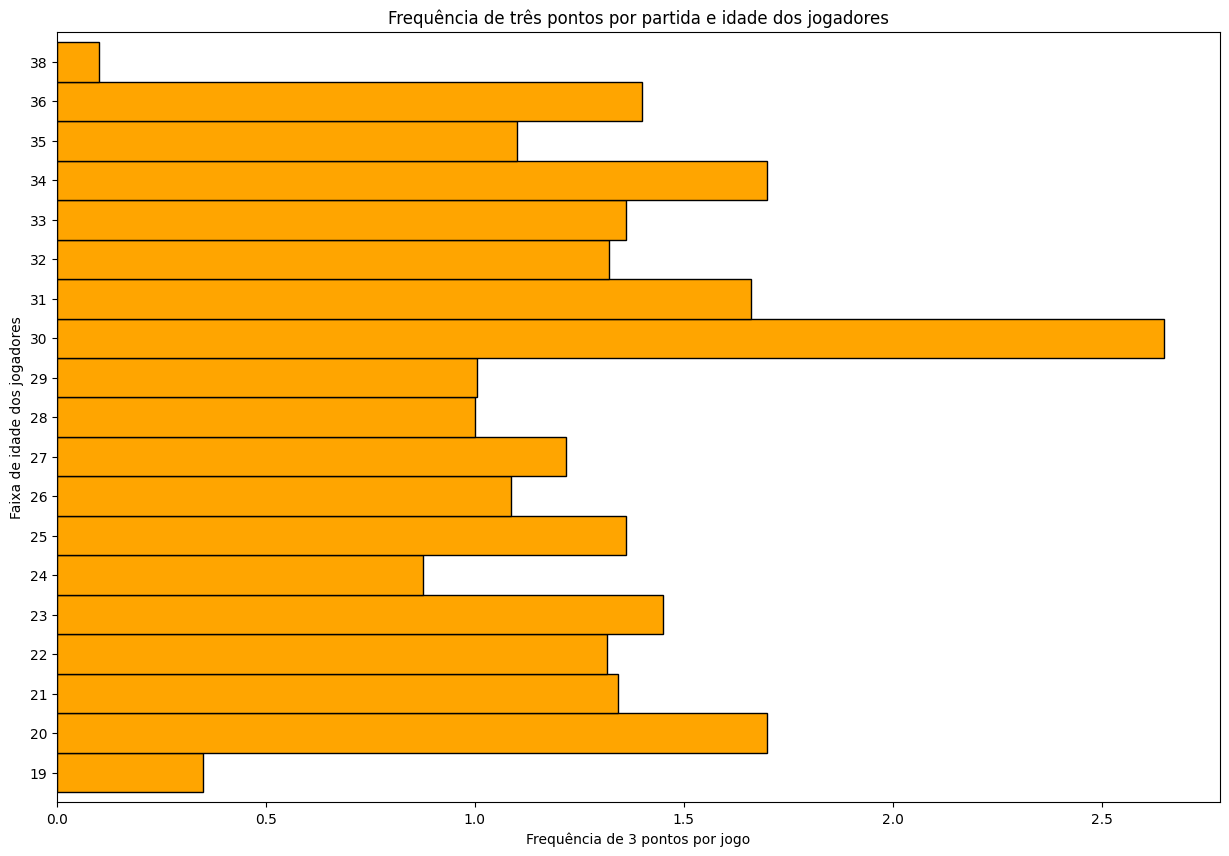

In [56]:
df.query("`3P` >= 0.1").groupby('Age')['3P'].mean().plot(
        kind= 'barh',
        color= 'orange',
        figsize = (15,10),
        width= 1,
        edgecolor= 'black'
)

plt.xlabel('Frequência de 3 pontos por jogo')
plt.ylabel('Faixa de idade dos jogadores')
plt.title('Frequência de três pontos por partida e idade dos jogadores')
plt.show()

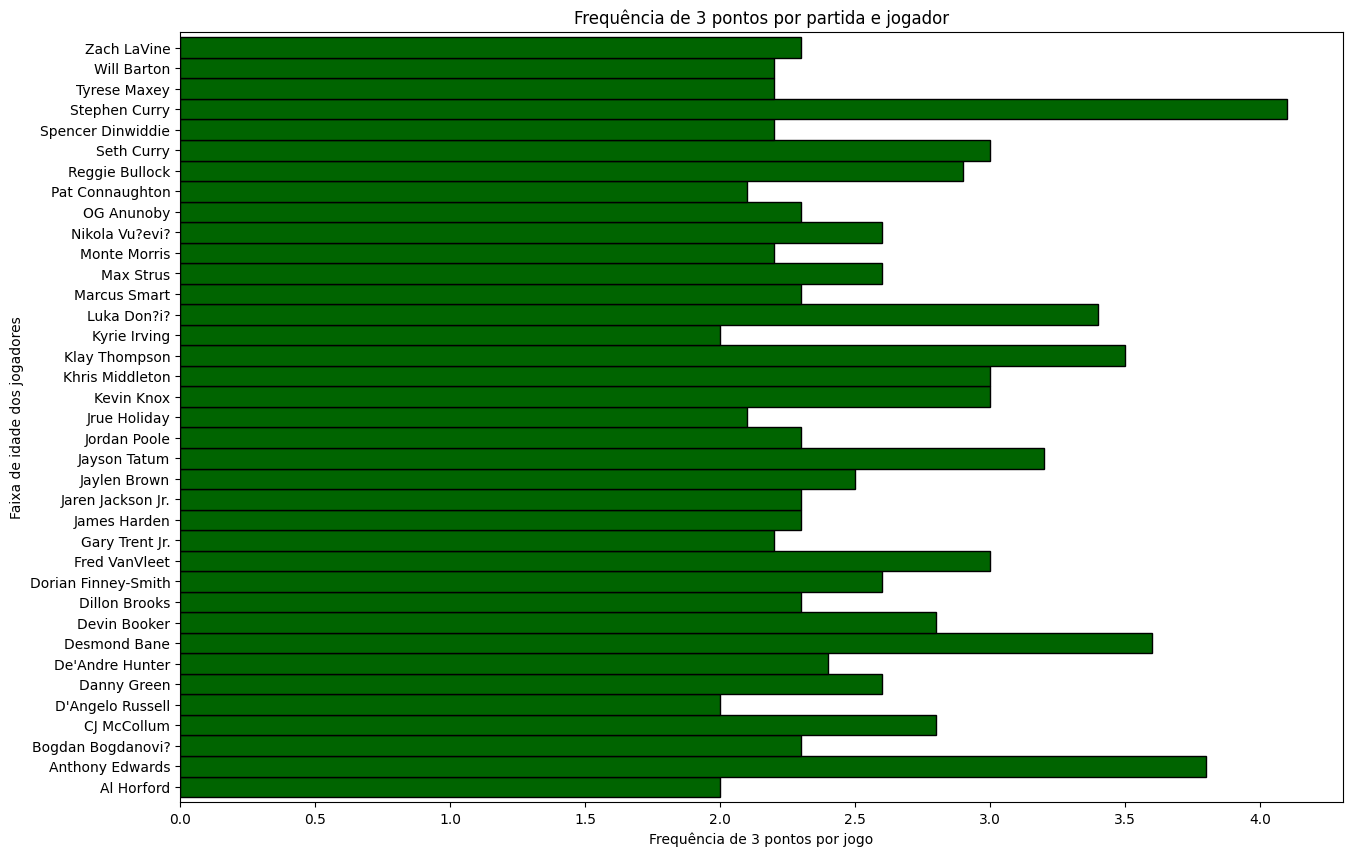

In [71]:
df.query("`3P` >= 2").groupby('Player')['3P'].mean().plot(
        kind= 'barh',
        color= 'Darkgreen',
        figsize = (15,10),
        width= 1,
        edgecolor= 'black'
)

plt.xlabel('Frequência de 3 pontos por jogo')
plt.ylabel('Faixa de idade dos jogadores')
plt.title('Frequência de 3 pontos por partida e jogador')
plt.show()

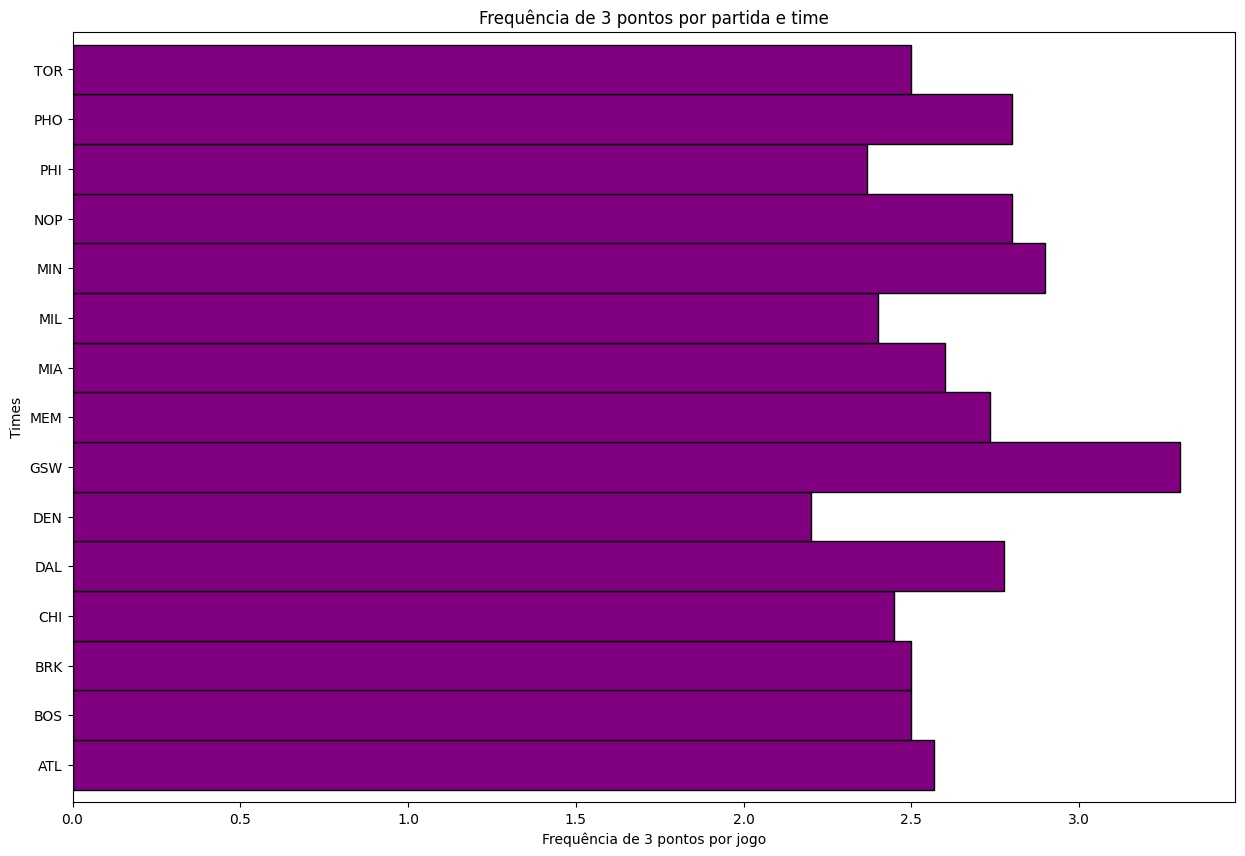

In [69]:
df.query("`3P` >= 2").groupby('Tm')['3P'].mean().plot(
        kind= 'barh',
        color= 'purple',
        figsize = (15,10),
        width= 1,
        edgecolor= 'black'
)

plt.xlabel('Frequência de 3 pontos por jogo')
plt.ylabel('Times')
plt.title('Frequência de 3 pontos por partida e time')
plt.show()

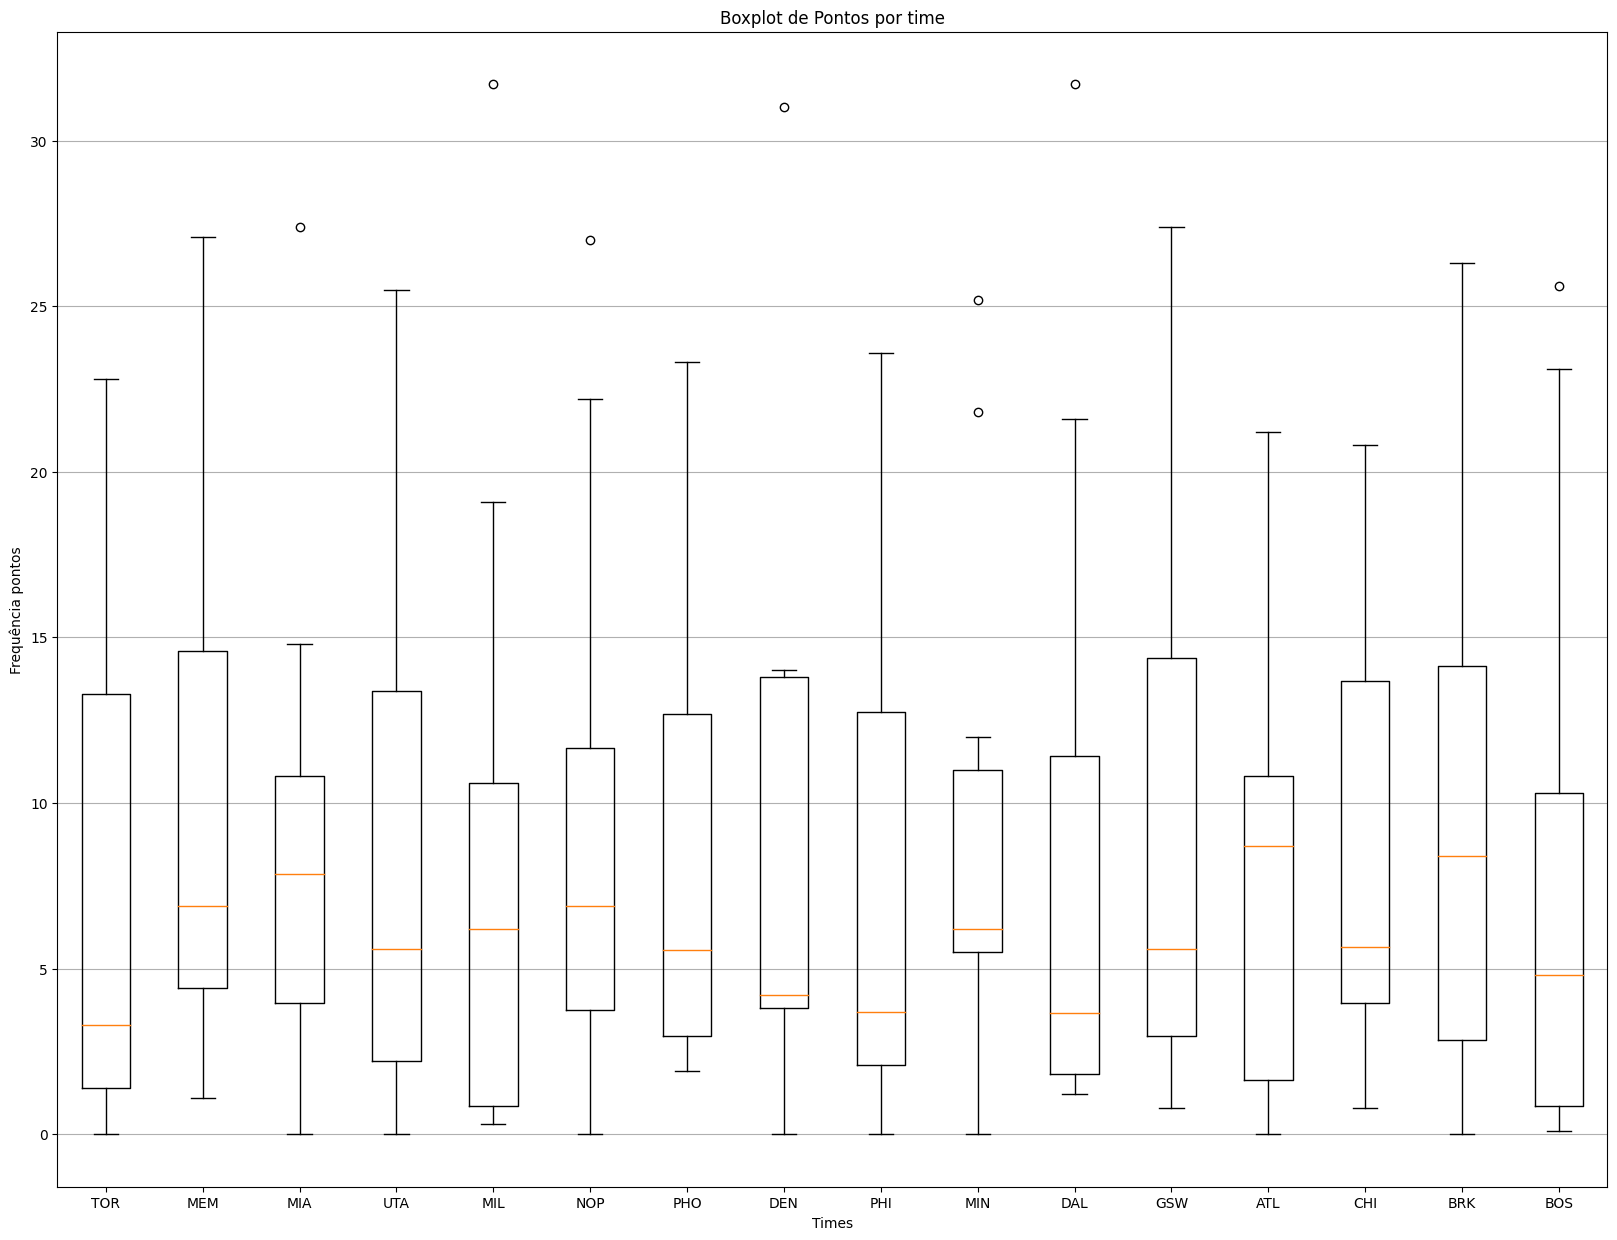

In [75]:
plt.figure(figsize=(20, 15))
plt.title('Boxplot de Pontos por time')
plt.ylabel('Frequência pontos')
plt.xlabel('Times')
plt.grid(axis='y')
plt.boxplot([df[df['Tm'] == time]['PTS'] for time in df['Tm'].unique()], labels=df['Tm'].unique())
plt.show()

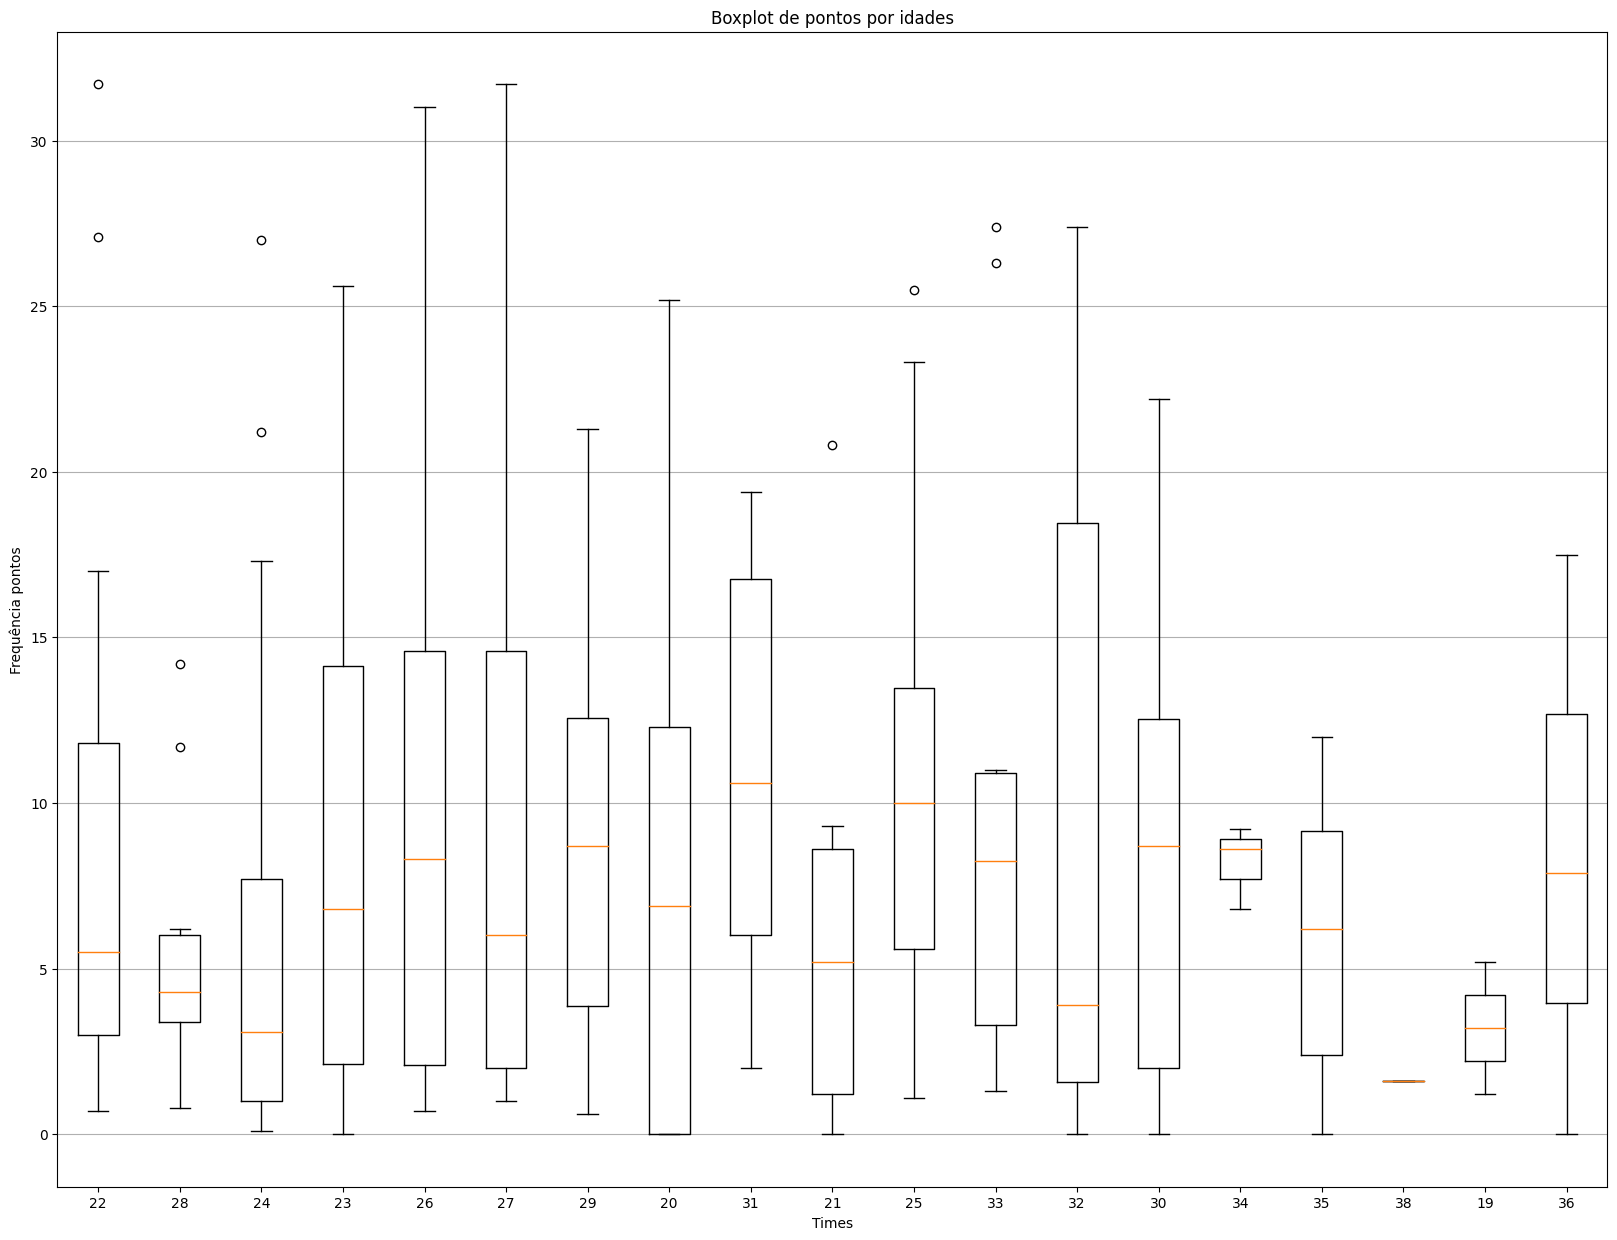

In [85]:
plt.figure(figsize=(20, 15))
plt.title('Boxplot de pontos por idades')
plt.ylabel('Frequência pontos')
plt.xlabel('Times')
plt.grid(axis='y')
plt.boxplot([df[df['Age'] == time]['PTS'] for time in df['Age'].unique()], labels=df['Age'].unique())
plt.show()

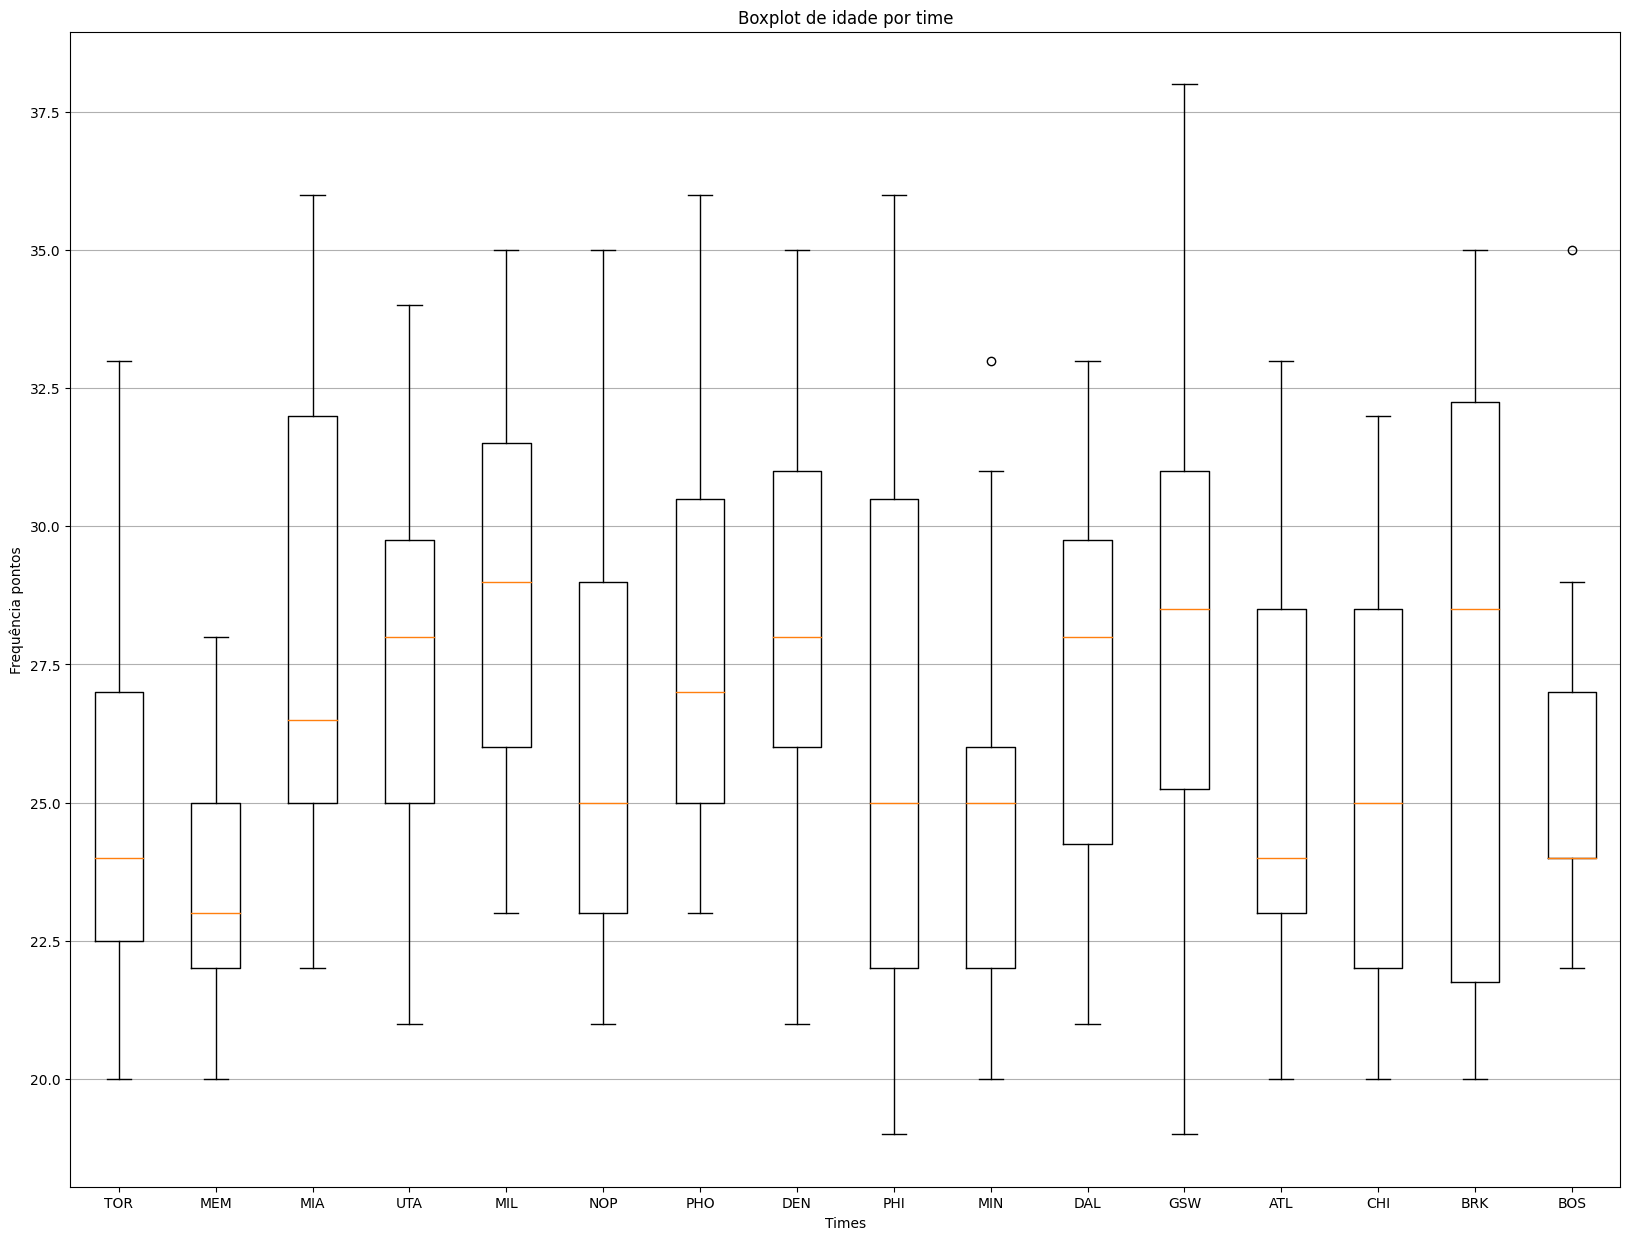

In [87]:
plt.figure(figsize=(20, 15))
plt.title('Boxplot de idade por time')
plt.ylabel('Frequência pontos')
plt.xlabel('Times')
plt.grid(axis='y')
plt.boxplot([df[df['Tm'] == time]['Age'] for time in df['Tm'].unique()], labels=df['Tm'].unique())
plt.show()

In [31]:
# conn.close()